# Water For all - Model to classify the Water Potability

In [3]:
# Import Libraries
#System
import os 

#Warnings
import warnings
warnings.filterwarnings('ignore')

#Data Transformation and Modelling
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import datetime as dt
import time

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'png'



In [4]:
# default plotting styles - Use This Function
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None 
set_sns_format(width=7, height=4)

## Business Understanding

#### Link to business Problem 

* Company occupation

Water For All is a world wide Laboratory specialized in water quality analysis.

Water For wants to create a hand device to analyze the potability of water.  

* Business Problem

Water For All has contacted his Data Scientist Department to create a model which will be deployed in all his Hand Devices to Check the Water Potability. 

Water For All has created a sensor for every feature on the Dataset. 

#### About Dataset

* Context

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

* Content

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## Data Mining

In [5]:
## Read the Dataset

df = pd.read_csv("./dataset/water_potability.csv")

#### Short understanding of the Dataset

In [6]:
#Shape
df.shape

(3276, 10)

In [7]:
df['Potability'].value_counts(normalize=True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

In [8]:
df['Potability'].value_counts(normalize=True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [11]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Data Cleaning

### OUTLIERS

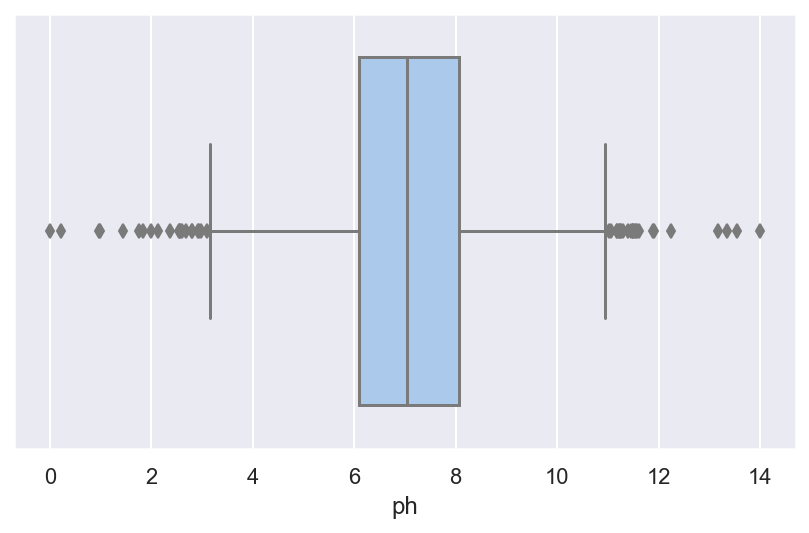

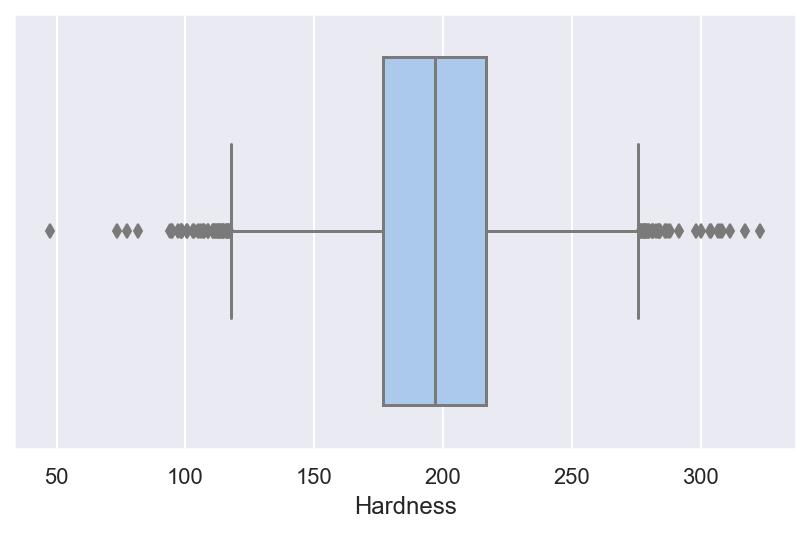

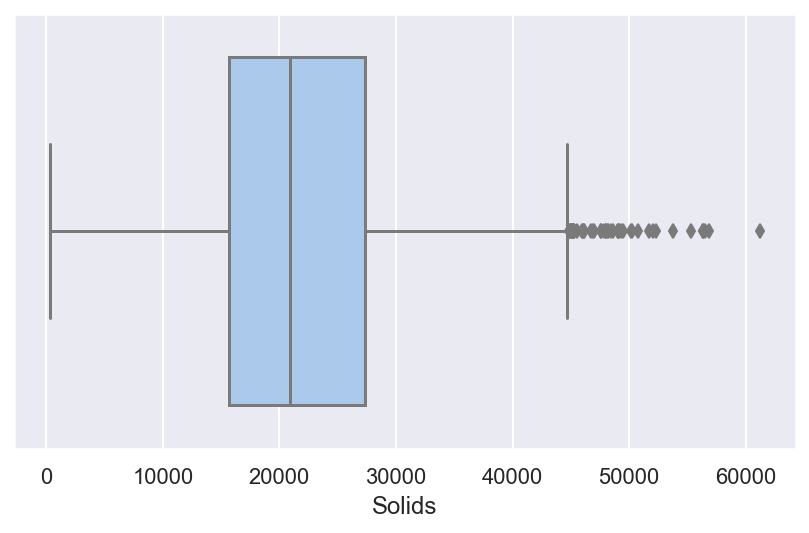

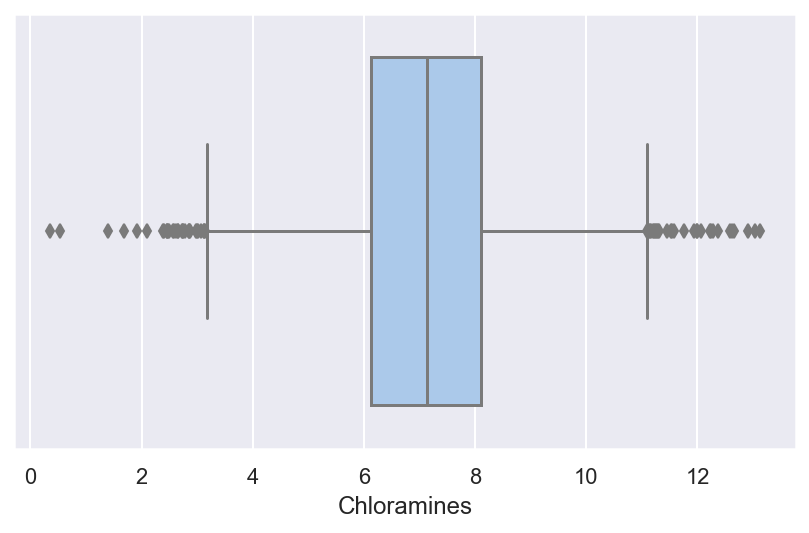

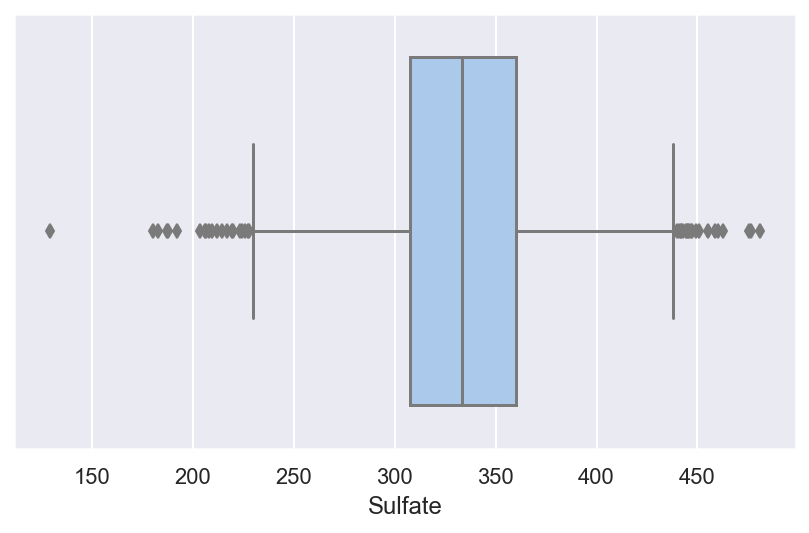

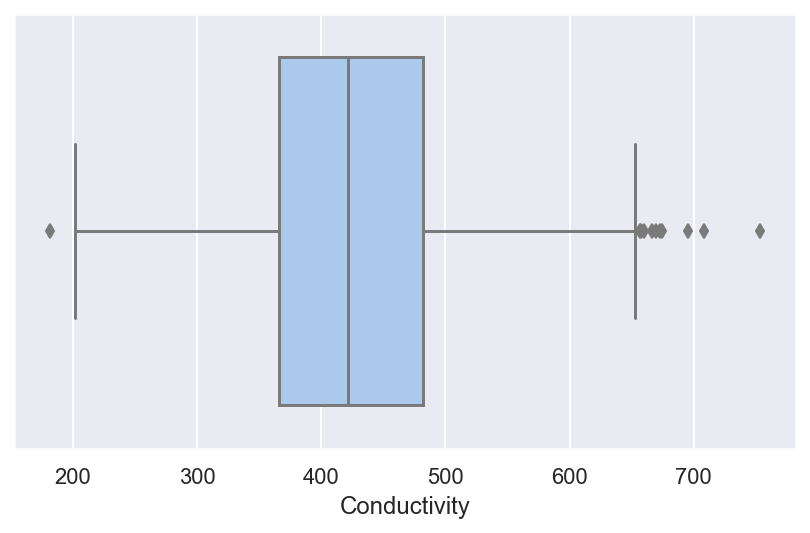

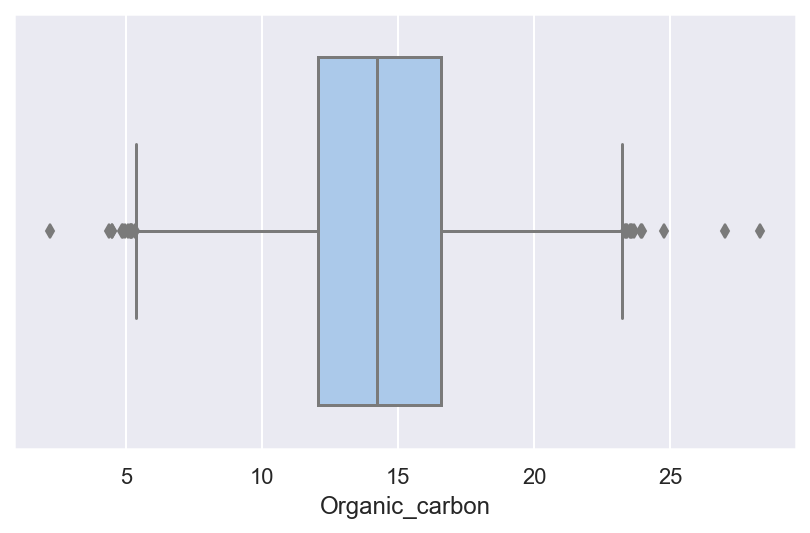

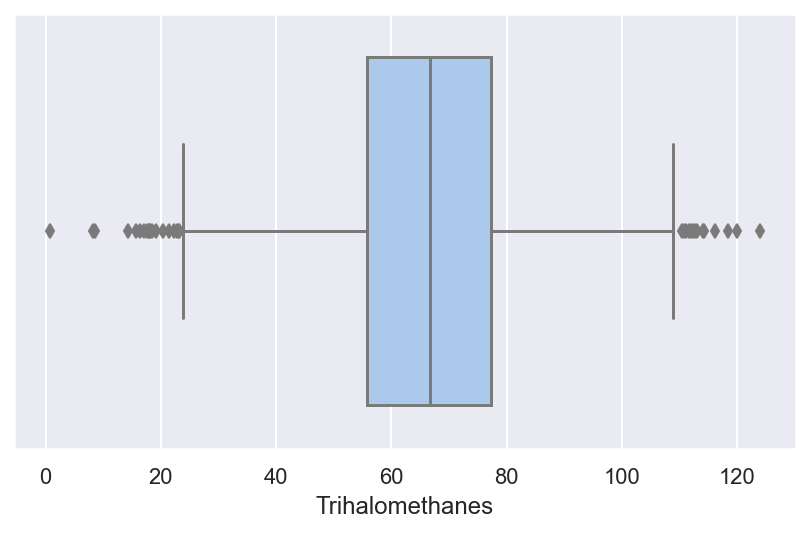

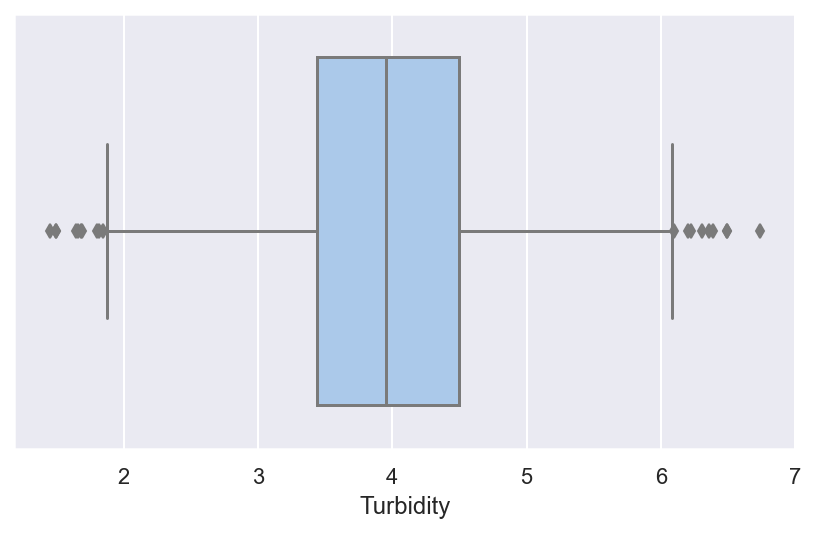

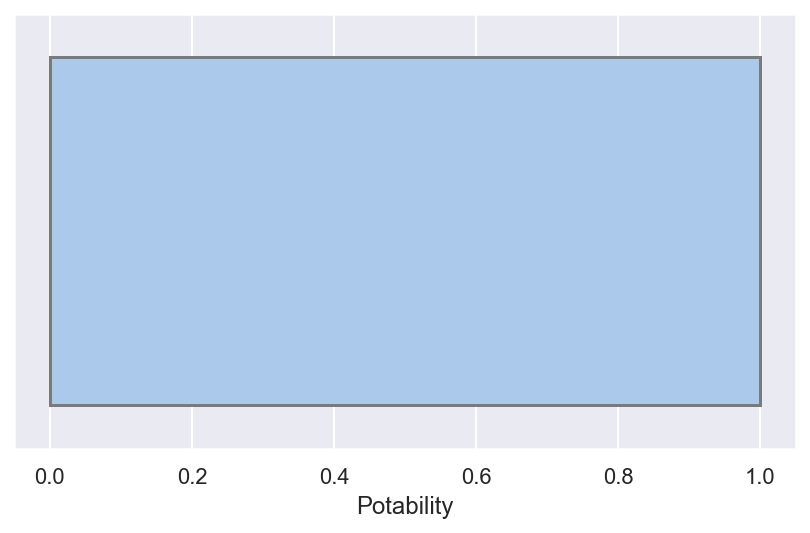

In [12]:
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.show()

### Missing Values

In [13]:
df.isna().sum().sort_values(ascending=False)

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

In [14]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10, weights="uniform")

In [15]:
def missing_values_KNN_imptuter(df):
    neighbors = [2, 4, 6, 8, 10]
    for n in neighbors: 
        imputer = KNNImputer(n_neighbors=n, weights="uniform")
        l = imputer.fit_transform(df)
        if n == 2:
            df2 = pd.DataFrame(l, columns=df.columns)
        elif n == 4:
            df4 = pd.DataFrame(l, columns=df.columns)
        elif n == 6:
            df6 = pd.DataFrame(l, columns=df.columns)
        elif n == 8:
            df8 = pd.DataFrame(l, columns=df.columns)
        elif n == 10:
            df10 = pd.DataFrame(l, columns=df.columns)
    table = pd.concat([df['ph'].describe(), df2['ph'].describe(), df4['ph'].describe(), df6['ph'].describe(), df8['ph'].describe(), df10['ph'].describe()], 
    axis=1, keys=['PH', 'PH2', 'PH4', 'PH6', 'PH8','PH10'])
    return table, df, df2, df4, df6, df8, df10

In [16]:
table, df, df2, df4, df6, df8, df10 = missing_values_KNN_imptuter(df)

In [17]:
table

,PH,PH2,PH4,PH6,PH8,PH10
count,2785.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,7.079136,7.075520,7.079273,7.078470,7.079837
std,1.594320,1.532524,1.505125,1.492986,1.487870,1.484111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.093092,6.114968,6.168301,6.206682,6.217584,6.254505
50%,7.036752,7.035894,7.039150,7.043585,7.042989,7.034555
75%,8.062066,8.018787,7.959669,7.947736,7.918103,7.913438
max,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000


In [18]:
df10.isna().sum().sort_values(ascending=False)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Feature Egineenring

In [19]:
X = df10.drop(columns=['Potability', 'Conductivity'])

y = df10['Potability']

In [20]:
df10.to_csv('non_nan.csv')

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0, stratify=y)

In [22]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity
3011,6.901111,154.474092,21103.303188,7.928700,376.001071,14.643306,71.321372,3.616498
2971,4.281522,188.783577,22330.466787,6.957676,325.160819,16.274857,82.595223,4.371167
2631,3.230973,120.785449,13691.094972,6.835951,328.240289,18.406139,54.852123,3.281921
1472,5.866703,159.433175,16298.001347,5.784709,319.709869,11.055446,79.288740,5.302973
1850,7.793039,257.657739,17398.385843,8.271246,251.383944,9.557031,54.235433,3.389270
...,...,...,...,...,...,...,...,...
687,5.898726,198.310020,21148.241905,9.124900,326.254282,13.042948,74.311619,4.899815
704,6.144759,210.979747,19981.315188,9.203614,271.097104,17.187963,79.634242,3.082080
2423,7.074251,208.920369,16739.266635,7.861469,322.457037,8.881999,78.419019,4.878944
1991,7.295141,182.406645,13706.186808,5.887885,300.608233,18.063470,73.836909,5.056104


In [23]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity
1004,7.884842,229.242660,21733.828044,7.903081,315.189984,11.635399,49.804322,4.631641
1339,6.703583,214.972435,36112.134634,7.094066,324.581921,15.874564,71.631818,2.432507
57,4.999414,190.287050,24323.865903,7.230164,324.893038,8.236558,99.427385,4.460684
2097,10.164839,194.302801,28915.643224,7.301689,316.525209,18.452310,63.062458,2.937686
2717,7.145347,233.063426,36640.371366,10.000218,435.115189,16.635476,61.073710,4.849755
...,...,...,...,...,...,...,...,...
1452,8.174028,192.390430,19808.537766,6.955821,377.700189,13.780973,59.542769,3.986781
2521,8.240946,245.090825,18001.459186,9.367419,350.614962,13.904710,54.413158,4.666295
2652,8.303831,222.950037,26030.618514,7.108974,344.680863,14.383585,70.072700,3.392657
2942,7.301903,224.467802,23565.178404,7.554047,280.129485,8.524864,68.940193,3.430699


In [24]:
y_test

1004    0.0
1339    0.0
57      0.0
2097    0.0
2717    1.0
       ... 
1452    0.0
2521    0.0
2652    0.0
2942    0.0
3209    1.0
Name: Potability, Length: 656, dtype: float64

In [25]:
y_train

3011    0.0
2971    0.0
2631    0.0
1472    0.0
1850    0.0
       ... 
687     1.0
704     1.0
2423    1.0
1991    1.0
2368    1.0
Name: Potability, Length: 2620, dtype: float64

## Modeling - Feature Engineering  - Model Selection - Model HyperTunning

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures

scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = PolynomialFeatures(degree=2, interaction_only=True)
scaler4 = MaxAbsScaler()
scaler5 = RobustScaler()
scaler6 = Normalizer()
scaler7 = QuantileTransformer()
scaler8 = PowerTransformer()

In [27]:
# Import different models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


# Import the scoring
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

model1 = LogisticRegression(max_iter=1e5)
model2 = KNeighborsClassifier()
model3= DecisionTreeClassifier()
model4=RandomForestClassifier()
model5= SVC()
model10 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')
model20 = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [28]:
def model_inplace(scaler, model, X_train, X_test, y_train, y_test):
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confuaion_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    preccision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_Score = f1_score(y_test, y_pred)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    heatmap = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=2,cmap='Pastel1',fmt='.3g',linecolor='purple',square=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(str(model))
    plt.savefig(f'viz/confusion_Matrix{str(model)[:40]}.png')
    classification = classification_report(y_test,y_pred)
    return confuaion_matrix, accuracy, preccision, recall, f1_Score, score_train, score_test, heatmap


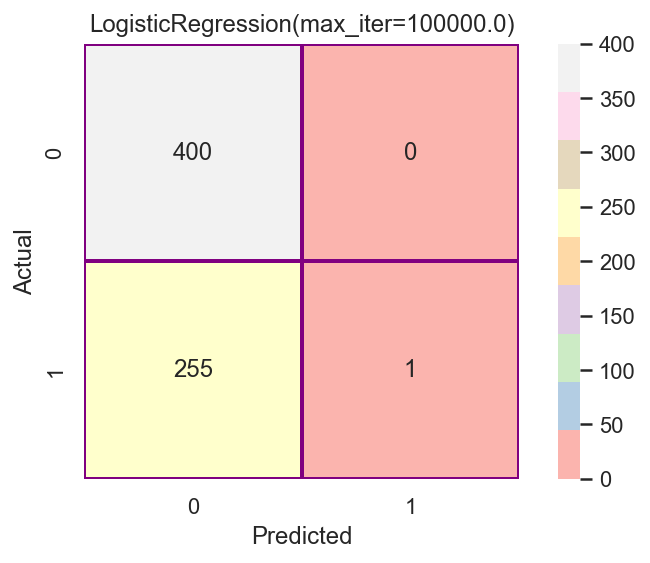

In [29]:
#Scaler StandardScaler() #Model Logistic Regression = s1m1

s1m1confuaion_matrix, s1m1accuracy, s1m1preccision, s1m1recall, s1m1f1_score, s1m1_score_train, s1m1_score_test, heatmap  = model_inplace(scaler1, model1, X_train, X_test, y_train, y_test)


In [30]:
print(f'Confusion Matrix S1M1 \n {s1m1confuaion_matrix}')
print(f'Accuracy S1M1 {s1m1accuracy} \n ')
print(f'Precision S1M1 {s1m1preccision} \n')
print(f'Recall  S1M1 {s1m1recall} \n')
print(f'F1_Score {s1m1f1_score} \n')
print(f'Score_Train {s1m1_score_train} \n')
print(f'Score_test {s1m1_score_test} \n')



Confusion Matrix S1M1 
 [[400   0]
 [255   1]]
Accuracy S1M1 0.6112804878048781 
 
Precision S1M1 1.0 

Recall  S1M1 0.00390625 

F1_Score 0.007782101167315175 

Score_Train 0.6103053435114504 

Score_test 0.6112804878048781 



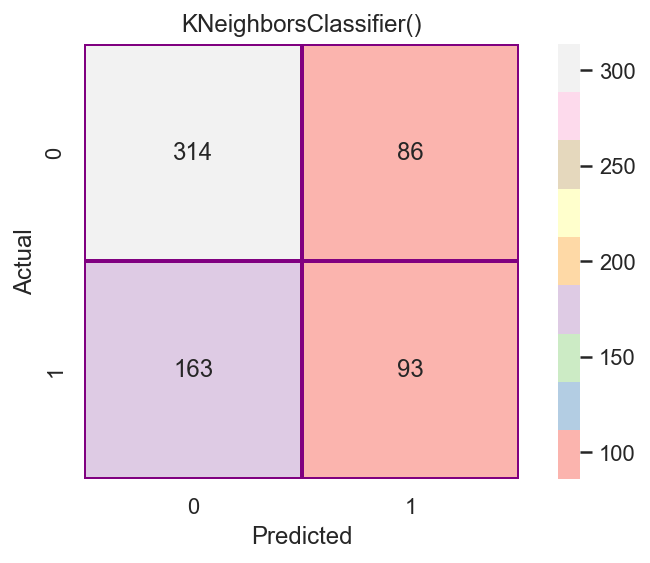

In [31]:
#Scaler StandardScaler() #Model knn = s1m2

s1m2confuaion_matrix, s1m2accuracy, s1m2preccision, s1m2recall, s1m2f1_score, s1m2_score_train, s1m2_score_test, heatmap  = model_inplace(scaler1, model2, X_train, X_test, y_train, y_test)


In [32]:
print(f'Confusion Matrix S1M2 \n {s1m2confuaion_matrix}')
print(f'Accuracy S1M2 {s1m2accuracy} \n')
print(f'Precision S1M2 {s1m2preccision} \n')
print(f'Recall  S1M2 {s1m2recall} \n')
print(f'F1_Score S1M2 {s1m2f1_score} \n')
print(f'Score_Train S1M2 {s1m2_score_train} \n')
print(f'Score_test S1M2 {s1m2_score_test} \n')

Confusion Matrix S1M2 
 [[314  86]
 [163  93]]
Accuracy S1M2 0.6204268292682927 

Precision S1M2 0.5195530726256983 

Recall  S1M2 0.36328125 

F1_Score S1M2 0.42758620689655175 

Score_Train S1M2 0.767175572519084 

Score_test S1M2 0.6204268292682927 



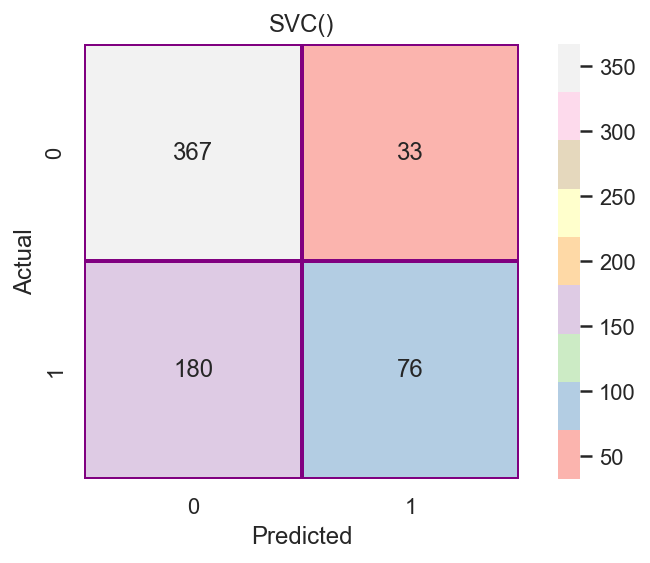

In [33]:
#Scaler StandardScaler() #Model SVM = s1m2

s1m5confuaion_matrix, s1m5accuracy, s1m5preccision, s1m5recall, s1m5f1_score, s1m5_score_train, s1m5_score_test, heatmap  = model_inplace(scaler1, model5, X_train, X_test, y_train, y_test)


In [34]:
print(f'Confusion Matrix S1M1 \n {s1m5confuaion_matrix}')
print(f'Accuracy S1M1 {s1m5accuracy} \n')
print(f'Precision S1M1 {s1m5preccision} \n')
print(f'Recall  S1M1 {s1m5recall} \n')
print(f'F1_Score {s1m5f1_score} \n')
print(f'Score_Train {s1m5_score_train} \n')
print(f'Score_test {s1m5_score_test} \n')

Confusion Matrix S1M1 
 [[367  33]
 [180  76]]
Accuracy S1M1 0.6753048780487805 

Precision S1M1 0.6972477064220184 

Recall  S1M1 0.296875 

F1_Score 0.41643835616438357 

Score_Train 0.7255725190839695 

Score_test 0.6753048780487805 



In [35]:
def model_inplace_tree(scaler, model, X_train, X_test, y_train, y_test):
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confuaion_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    preccision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_Score = f1_score(y_test, y_pred)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    heatmap = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=2,cmap='Pastel1',fmt='.3g',linecolor='purple',square=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(str(model)+' not_scaled')
    plt.savefig(f'viz/confusion_Matrix_not_scaled_{str(model)[:40]}.png')
    classification = classification_report(y_test,y_pred)
    return confuaion_matrix, accuracy, preccision, recall, f1_Score, score_train, score_test, heatmap

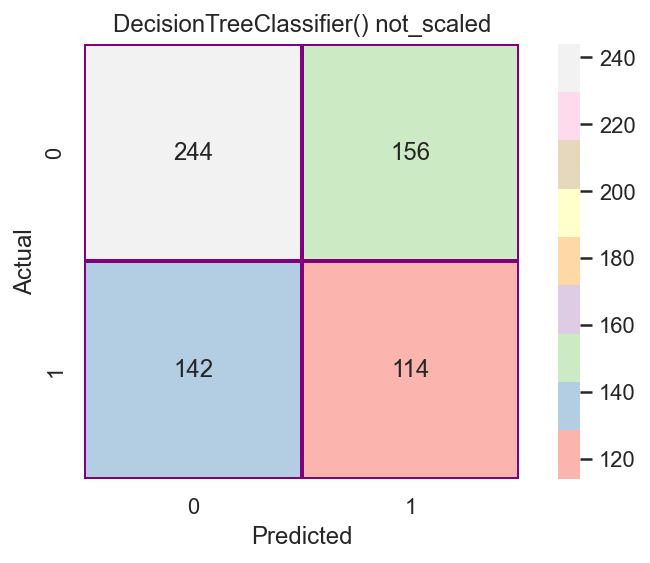

In [36]:
#NoScaler #Model Decision Tree = s1m3

m3confuaion_matrix, m3accuracy, m3preccision, m3recall, m3f1_score, m3_score_train, m3_score_test, heatmap  = model_inplace_tree(scaler1, model3, X_train, X_test, y_train, y_test)


In [37]:
print(f'Confusion Matrix S1M1 \n {m3confuaion_matrix}')
print(f'Accuracy S1M1 {m3accuracy} \n')
print(f'Precision S1M1 {m3preccision} \n')
print(f'Recall  S1M1 {m3recall} \n')
print(f'F1_Score {m3f1_score} \n')
print(f'Score_Train {m3_score_train} \n')
print(f'Score_test {m3_score_test} \n')

Confusion Matrix S1M1 
 [[244 156]
 [142 114]]
Accuracy S1M1 0.5457317073170732 

Precision S1M1 0.4222222222222222 

Recall  S1M1 0.4453125 

F1_Score 0.43346007604562736 

Score_Train 1.0 

Score_test 0.5457317073170732 



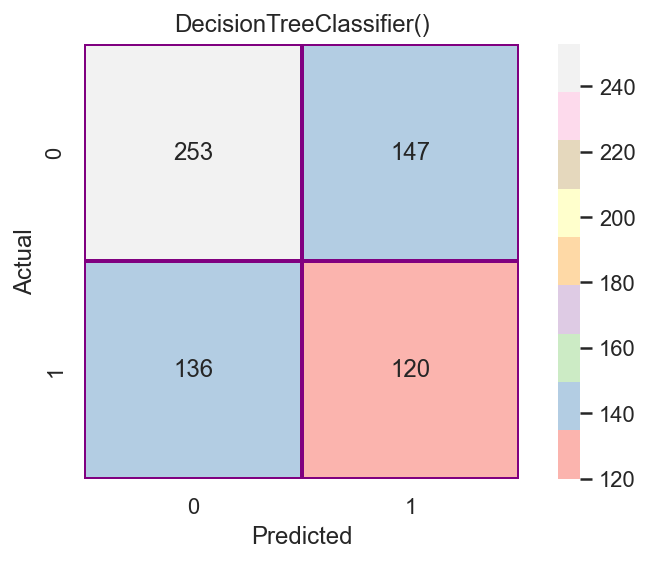

In [38]:
#Standard_Scaler #Model Decision Tree = s1m3

s1m3confuaion_matrix, s1m3accuracy, s1m3preccision, s1m3recall, s1m3f1_score, s1m3_score_train, s1m3_score_test, heatmap  = model_inplace(scaler1, model3, X_train, X_test, y_train, y_test)


In [39]:
print(f'Confusion Matrix S1M3 \n {s1m3confuaion_matrix}')
print(f'Accuracy S1M3 {s1m3accuracy} \n')
print(f'Precision S1M3 {s1m3preccision} \n')
print(f'Recall  S1M3 {s1m3recall} \n')
print(f'F1_Score {s1m3f1_score} \n')
print(f'Score_Train {s1m3_score_train} \n')
print(f'Score_test {s1m3_score_test} \n')

Confusion Matrix S1M3 
 [[253 147]
 [136 120]]
Accuracy S1M3 0.5685975609756098 

Precision S1M3 0.449438202247191 

Recall  S1M3 0.46875 

F1_Score 0.4588910133843212 

Score_Train 1.0 

Score_test 0.5685975609756098 



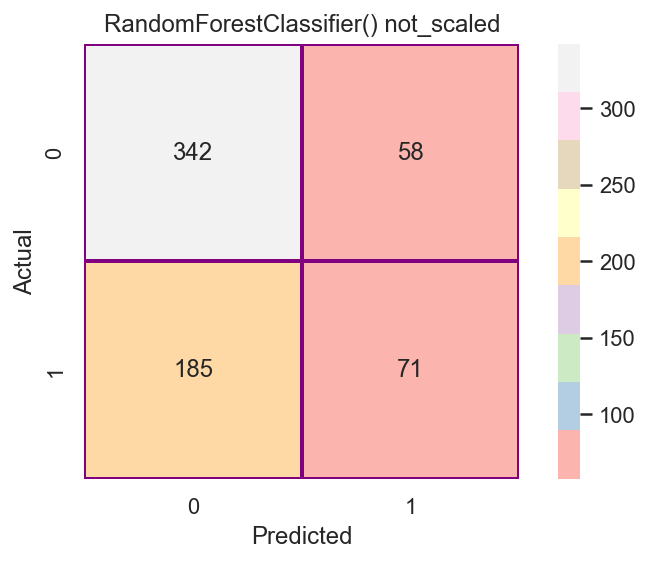

In [40]:
#NoScaler #Model Random = s1m4

m4confuaion_matrix, m4accuracy, m4preccision, m4recall, m4f1_score, m4_score_train, m4_score_test, heatmap  = model_inplace_tree(scaler1, model4, X_train, X_test, y_train, y_test)

In [41]:
print(f'Confusion Matrix S1M1 \n {m4confuaion_matrix}')
print(f'Accuracy S1M1 {m4accuracy} \n')
print(f'Precision S1M1 {m4preccision} \n')
print(f'Recall  S1M1 {m4recall} \n')
print(f'F1_Score {m4f1_score} \n')
print(f'Score_Train {m4_score_train} \n')
print(f'Score_test {m4_score_test} \n')

Confusion Matrix S1M1 
 [[342  58]
 [185  71]]
Accuracy S1M1 0.6295731707317073 

Precision S1M1 0.5503875968992248 

Recall  S1M1 0.27734375 

F1_Score 0.3688311688311688 

Score_Train 1.0 

Score_test 0.6295731707317073 



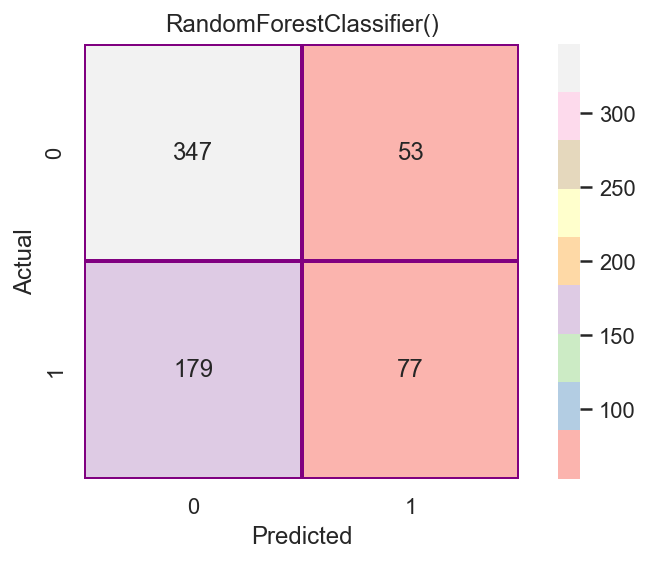

In [42]:
#Standard_Scaler #Model Random Forest = s1m4

s1m4confuaion_matrix, s1m4accuracy, s1m4preccision, s1m4recall, s1m4f1_score, s1m4_score_train, s1m4_score_test, heatmap  = model_inplace(scaler1, model4, X_train, X_test, y_train, y_test)


In [43]:
print(f'Confusion Matrix S1M3 \n {s1m4confuaion_matrix}')
print(f'Accuracy S1M3 {s1m4accuracy} \n')
print(f'Precision S1M3 {s1m4preccision} \n')
print(f'Recall  S1M3 {s1m4recall} \n')
print(f'F1_Score {s1m4f1_score} \n')
print(f'Score_Train {s1m4_score_train} \n')
print(f'Score_test {s1m4_score_test} \n')

Confusion Matrix S1M3 
 [[347  53]
 [179  77]]
Accuracy S1M3 0.6463414634146342 

Precision S1M3 0.5923076923076923 

Recall  S1M3 0.30078125 

F1_Score 0.3989637305699482 

Score_Train 1.0 

Score_test 0.6463414634146342 



In [44]:
model10 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001,
                       min_samples_leaf=40, min_samples_split=100,
                       min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

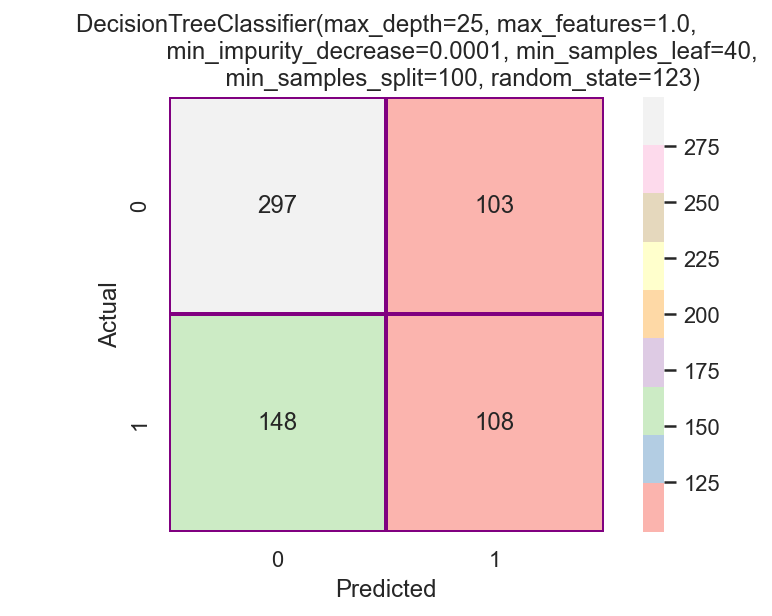

In [45]:
s5m10confuaion_matrix, s5m10accuracy, s5m10preccision, s5m10recall, s5m10f1_score, s5m10_score_train, s5m10_score_test, heatmap  = model_inplace(scaler1, model10, X_train, X_test, y_train, y_test)

In [46]:
print(f'Confusion Matrix S1M3 \n {s5m10confuaion_matrix}')
print(f'Accuracy S1M3 {s5m10accuracy} \n')
print(f'Precision S1M3 {s5m10preccision} \n')
print(f'Recall  S1M3 {s5m10recall} \n')
print(f'F1_Score {s5m10f1_score} \n')
print(f'Score_Train {s5m10_score_train} \n')
print(f'Score_test {s5m10_score_test} \n')

Confusion Matrix S1M3 
 [[297 103]
 [148 108]]
Accuracy S1M3 0.6173780487804879 

Precision S1M3 0.5118483412322274 

Recall  S1M3 0.421875 

F1_Score 0.4625267665952891 

Score_Train 0.6977099236641221 

Score_test 0.6173780487804879 



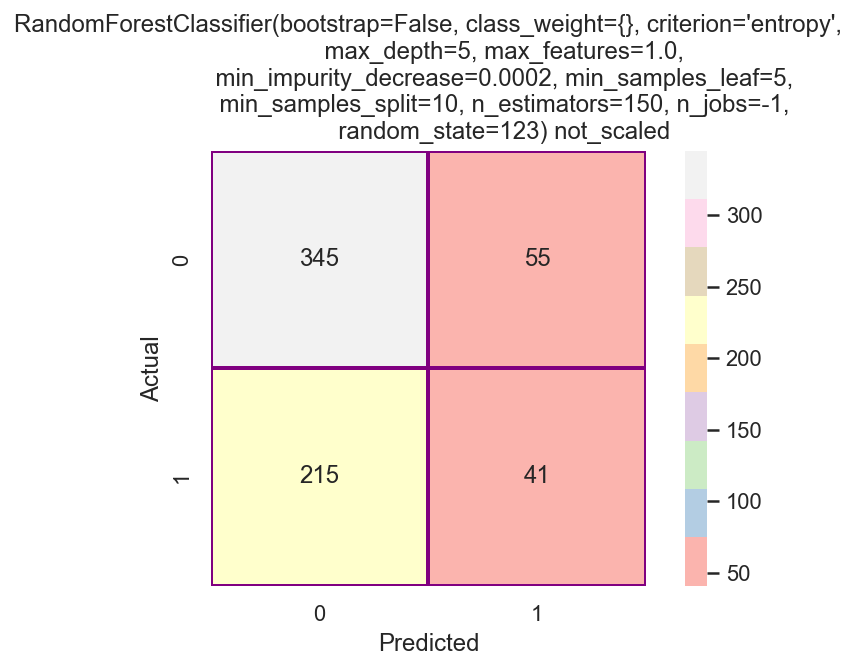

In [47]:
s5m20confuaion_matrix, s5m20accuracy, s5m20preccision, s5m20recall, s5m20f1_score, s5m20_score_train, s5m20_score_test, heatmap  = model_inplace_tree(scaler2, model20, X_train, X_test, y_train, y_test)

In [48]:
print(f'Confusion Matrix S1M3 \n {s5m10confuaion_matrix}')
print(f'Accuracy S1M3 {s5m10accuracy} \n')
print(f'Precision S1M3 {s5m10preccision} \n')
print(f'Recall  S1M3 {s5m10recall} \n')
print(f'F1_Score {s5m10f1_score} \n')
print(f'Score_Train {s5m10_score_train} \n')
print(f'Score_test {s5m10_score_test} \n')

Confusion Matrix S1M3 
 [[297 103]
 [148 108]]
Accuracy S1M3 0.6173780487804879 

Precision S1M3 0.5118483412322274 

Recall  S1M3 0.421875 

F1_Score 0.4625267665952891 

Score_Train 0.6977099236641221 

Score_test 0.6173780487804879 



In [49]:
logistic = pd.DataFrame(pd.Series([s1m1accuracy, s1m1preccision, s1m1recall, s1m1f1_score, s1m1_score_train, s1m1_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['Logistic'])
knn = pd.DataFrame(pd.Series([s1m2accuracy, s1m2preccision, s1m2recall, s1m2f1_score, s1m2_score_train, s1m2_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['knn'])
svm = pd.DataFrame(pd.Series([s1m5accuracy, s1m5preccision, s1m5recall, s1m5f1_score, s1m5_score_train, s1m5_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['svm'])
tree_scaled = pd.DataFrame(pd.Series([s1m3accuracy, s1m3preccision, s1m3recall, s1m3f1_score, s1m3_score_train, s1m3_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['Tree_Scaled'])
tree = pd.DataFrame(pd.Series([m3accuracy, m3preccision, m3recall, m3f1_score, m3_score_train, m3_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['Tree'])
random_scaled = pd.DataFrame(pd.Series([s1m4accuracy, s1m4preccision, s1m4recall, s1m4f1_score, s1m4_score_train, s1m4_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['Random_Scaled'])
random = pd.DataFrame(pd.Series([m4accuracy, m4preccision, m4recall, m4f1_score, m4_score_train, m4_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['Random'])
models = pd.concat([logistic, knn, svm, tree_scaled, tree, random_scaled, random], axis=1)

In [50]:
models = models.T

In [51]:
models = models.sort_values(by=['Recall', 'F1_Score'], ascending=False).round(2)
models.to_excel('Reports_Insight_Tables\model_selection_baseline.xlsx')

In [85]:
# Model Selection | Based on Recall and F1_Score 
models

,Accuray,Preccision,Recall,F1_Score,Score_Train,Score_Test
Tree_Scaled,0.57,0.45,0.47,0.46,1.00,0.57
Tree,0.55,0.42,0.45,0.43,1.00,0.55
knn,0.62,0.52,0.36,0.43,0.77,0.62
Random_Scaled,0.65,0.59,0.30,0.40,1.00,0.65
svm,0.68,0.70,0.30,0.42,0.73,0.68
Random,0.63,0.55,0.28,0.37,1.00,0.63
Logistic,0.61,1.00,0.00,0.01,0.61,0.61


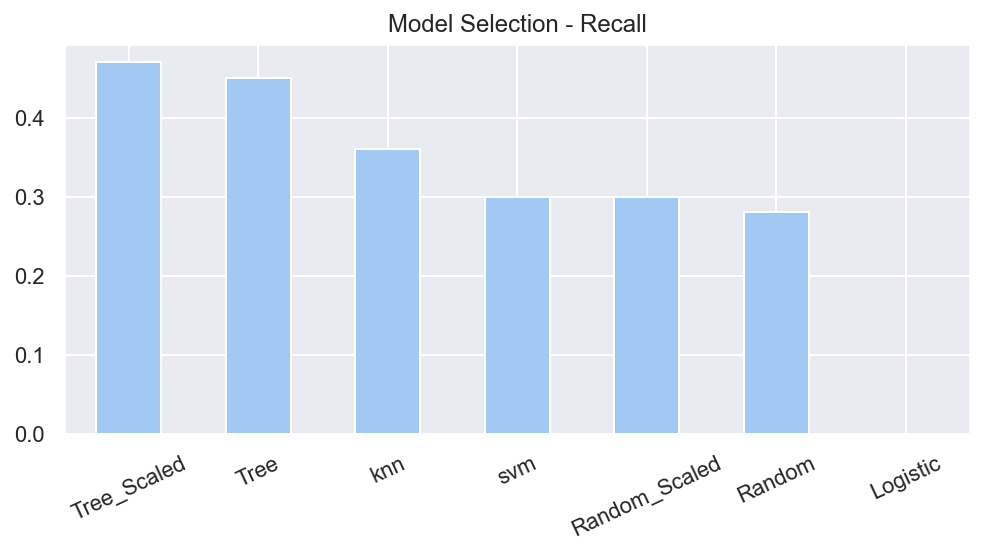

In [52]:
models.sort_values(by=['Recall', 'F1_Score'], ascending=False)['Recall'].plot(kind='bar')
plt.title('Model Selection - Recall')
plt.xticks(rotation=25)
plt.savefig('Model_Selection_Recall.png',bbox_inches="tight")
plt.tight_layout()

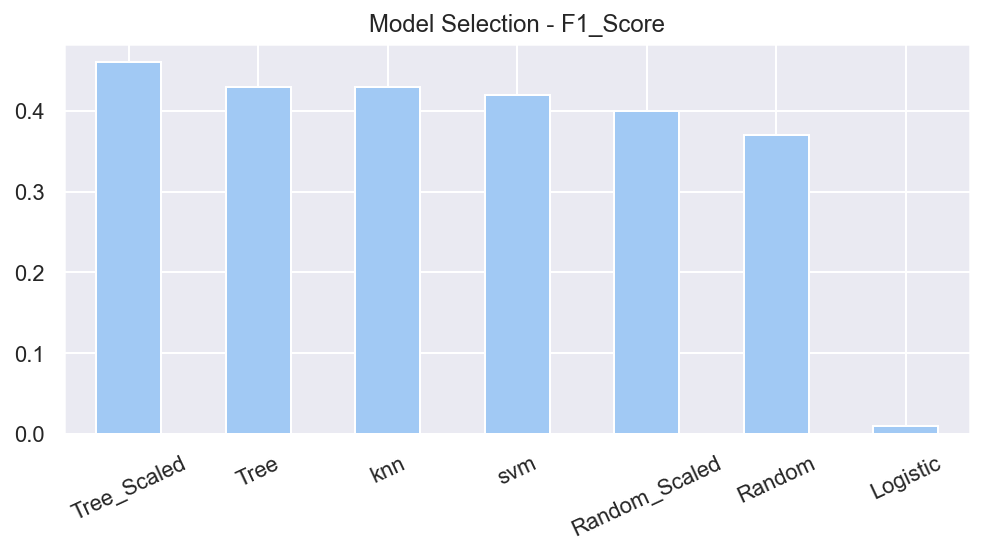

In [53]:
models.sort_values(by=['Recall', 'F1_Score'], ascending=False)['F1_Score'].plot(kind='bar')
plt.title('Model Selection - F1_Score')
plt.xticks(rotation=25)
plt.savefig('Model_Selection_F1_Score.png',bbox_inches="tight")
plt.tight_layout()

In [54]:
print(f'Confusion Matrix S1M3 \n {s1m3confuaion_matrix}')
print(f'Accuracy S1M3 {s1m3accuracy} \n')
print(f'Precision S1M3 {s1m3preccision} \n')
print(f'Recall  S1M3 {s1m3recall} \n')
print(f'F1_Score {s1m3f1_score} \n')
print(f'Score_Train {s1m3_score_train} \n')
print(f'Score_test {s1m3_score_test} \n')

Confusion Matrix S1M3 
 [[253 147]
 [136 120]]
Accuracy S1M3 0.5685975609756098 

Precision S1M3 0.449438202247191 

Recall  S1M3 0.46875 

F1_Score 0.4588910133843212 

Score_Train 1.0 

Score_test 0.5685975609756098 



Confusion Matrix S1M3 
 [[247 153]
 [134 122]]
Accuracy S1M3 0.5625 

Precision S1M3 0.44363636363636366 

Recall  S1M3 0.4765625 

F1_Score 0.4595103578154426 

Score_Train 1.0 

Score_test 0.5625 



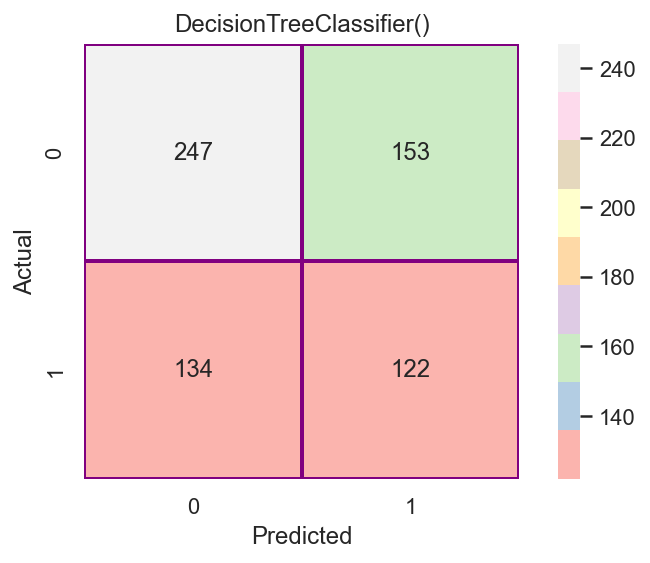

In [55]:
# scaler2 = MinMaxScaler() #Model Decision Tree = s1m3

s2m3confuaion_matrix, s2m3accuracy, s2m3preccision, s2m3recall, s2m3f1_score, s2m3_score_train, s2m3_score_test, heatmap  = model_inplace(scaler2, model3, X_train, X_test, y_train, y_test)
print(f'Confusion Matrix S1M3 \n {s2m3confuaion_matrix}')
print(f'Accuracy S1M3 {s2m3accuracy} \n')
print(f'Precision S1M3 {s2m3preccision} \n')
print(f'Recall  S1M3 {s2m3recall} \n')
print(f'F1_Score {s2m3f1_score} \n')
print(f'Score_Train {s2m3_score_train} \n')
print(f'Score_test {s2m3_score_test} \n')

Confusion Matrix S1M3 
 [[268 132]
 [137 119]]
Accuracy S1M3 0.5899390243902439 

Precision S1M3 0.47410358565737054 

Recall  S1M3 0.46484375 

F1_Score 0.46942800788954636 

Score_Train 1.0 

Score_test 0.5899390243902439 



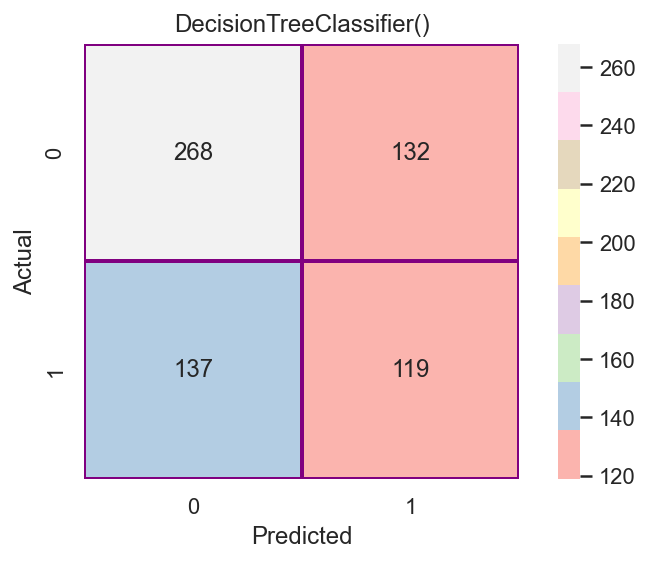

In [56]:
## scaler3 = PolynomialFeatures(degree=2, interaction_only=True) #Model Decision Tree = s1m3
s3m3confuaion_matrix, s3m3accuracy, s3m3preccision, s3m3recall, s3m3f1_score, s3m3_score_train, s3m3_score_test, heatmap  = model_inplace(scaler3, model3, X_train, X_test, y_train, y_test)
print(f'Confusion Matrix S1M3 \n {s3m3confuaion_matrix}')
print(f'Accuracy S1M3 {s3m3accuracy} \n')
print(f'Precision S1M3 {s3m3preccision} \n')
print(f'Recall  S1M3 {s3m3recall} \n')
print(f'F1_Score {s3m3f1_score} \n')
print(f'Score_Train {s3m3_score_train} \n')
print(f'Score_test {s3m3_score_test} \n')

Confusion Matrix S1M3 
 [[245 155]
 [141 115]]
Accuracy S1M3 0.5487804878048781 

Precision S1M3 0.42592592592592593 

Recall  S1M3 0.44921875 

F1_Score 0.4372623574144487 

Score_Train 1.0 

Score_test 0.5487804878048781 



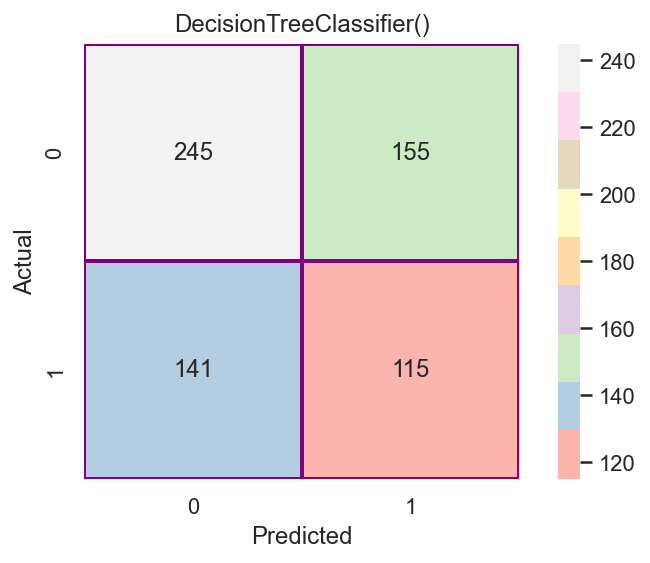

In [57]:

## scaler4 = MaxAbsScaler() #Model Decision Tree = s1m3

s4m3confuaion_matrix, s4m3accuracy, s4m3preccision, s4m3recall, s4m3f1_score, s4m3_score_train, s4m3_score_test, heatmap  = model_inplace(scaler4, model3, X_train, X_test, y_train, y_test)
print(f'Confusion Matrix S1M3 \n {s4m3confuaion_matrix}')
print(f'Accuracy S1M3 {s4m3accuracy} \n')
print(f'Precision S1M3 {s4m3preccision} \n')
print(f'Recall  S1M3 {s4m3recall} \n')
print(f'F1_Score {s4m3f1_score} \n')
print(f'Score_Train {s4m3_score_train} \n')
print(f'Score_test {s4m3_score_test} \n')

Confusion Matrix S1M3 
 [[237 163]
 [141 115]]
Accuracy S1M3 0.5365853658536586 

Precision S1M3 0.4136690647482014 

Recall  S1M3 0.44921875 

F1_Score 0.4307116104868914 

Score_Train 1.0 

Score_test 0.5365853658536586 



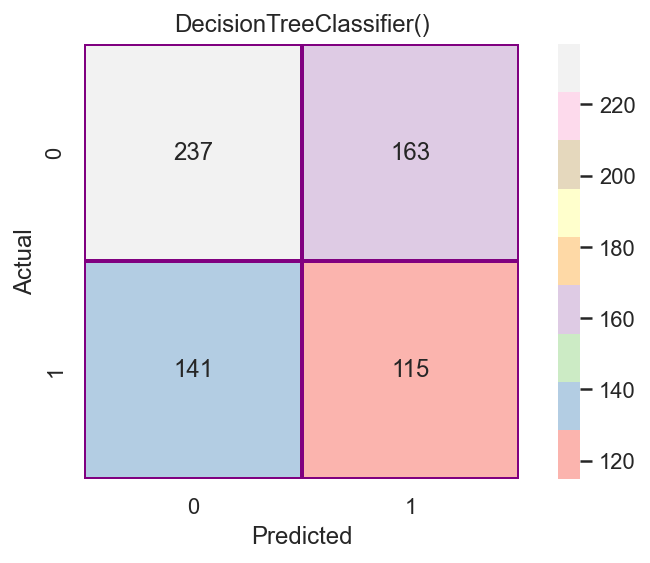

In [58]:
#scaler5 = RobustScaler() #Model Decision Tree = s1m3

s5m3confuaion_matrix, s5m3accuracy, s5m3preccision, s5m3recall, s5m3f1_score, s5m3_score_train, s5m3_score_test, heatmap  = model_inplace(scaler5, model3, X_train, X_test, y_train, y_test)
print(f'Confusion Matrix S1M3 \n {s5m3confuaion_matrix}')
print(f'Accuracy S1M3 {s5m3accuracy} \n')
print(f'Precision S1M3 {s5m3preccision} \n')
print(f'Recall  S1M3 {s5m3recall} \n')
print(f'F1_Score {s5m3f1_score} \n')
print(f'Score_Train {s5m3_score_train} \n')
print(f'Score_test {s5m3_score_test} \n')

Confusion Matrix S1M3 
 [[264 136]
 [154 102]]
Accuracy S1M3 0.5579268292682927 

Precision S1M3 0.42857142857142855 

Recall  S1M3 0.3984375 

F1_Score 0.41295546558704455 

Score_Train 1.0 

Score_test 0.5579268292682927 



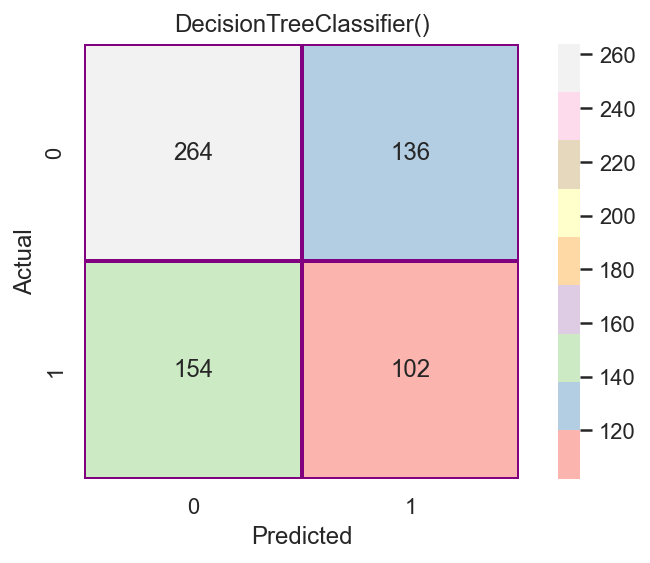

In [59]:

# scaler6 = Normalizer() #Model Decision Tree = s1m3

s6m3confuaion_matrix, s6m3accuracy, s6m3preccision, s6m3recall, s6m3f1_score, s6m3_score_train, s6m3_score_test, heatmap  = model_inplace(scaler6, model3, X_train, X_test, y_train, y_test)
print(f'Confusion Matrix S1M3 \n {s6m3confuaion_matrix}')
print(f'Accuracy S1M3 {s6m3accuracy} \n')
print(f'Precision S1M3 {s6m3preccision} \n')
print(f'Recall  S1M3 {s6m3recall} \n')
print(f'F1_Score {s6m3f1_score} \n')
print(f'Score_Train {s6m3_score_train} \n')
print(f'Score_test {s6m3_score_test} \n')

Confusion Matrix S1M3 
 [[245 155]
 [136 120]]
Accuracy S1M3 0.5564024390243902 

Precision S1M3 0.43636363636363634 

Recall  S1M3 0.46875 

F1_Score 0.4519774011299435 

Score_Train 1.0 

Score_test 0.5564024390243902 



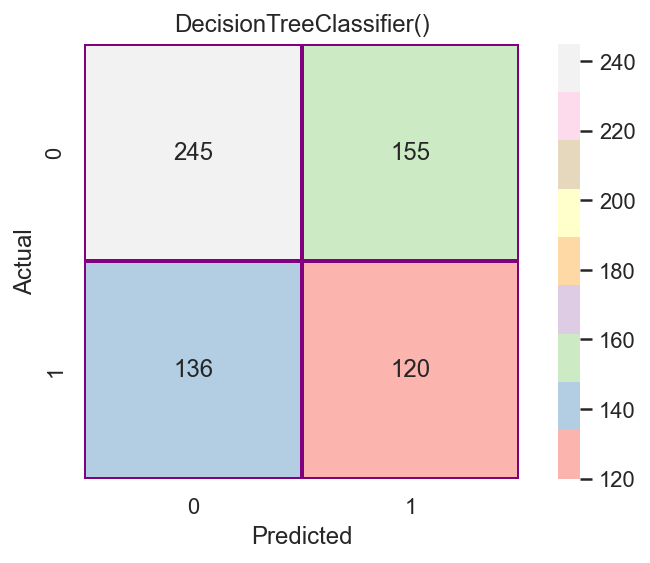

In [60]:
# scaler7 = QuantileTransformer()#Model Decision Tree = s1m3
s7m3confuaion_matrix, s7m3accuracy, s7m3preccision, s7m3recall, s7m3f1_score, s7m3_score_train, s7m3_score_test, heatmap  = model_inplace(scaler7, model3, X_train, X_test, y_train, y_test)
print(f'Confusion Matrix S1M3 \n {s7m3confuaion_matrix}')
print(f'Accuracy S1M3 {s7m3accuracy} \n')
print(f'Precision S1M3 {s7m3preccision} \n')
print(f'Recall  S1M3 {s7m3recall} \n')
print(f'F1_Score {s7m3f1_score} \n')
print(f'Score_Train {s7m3_score_train} \n')
print(f'Score_test {s7m3_score_test} \n')

Confusion Matrix S1M3 
 [[244 156]
 [140 116]]
Accuracy S1M3 0.5487804878048781 

Precision S1M3 0.4264705882352941 

Recall  S1M3 0.453125 

F1_Score 0.43939393939393934 

Score_Train 1.0 

Score_test 0.5487804878048781 



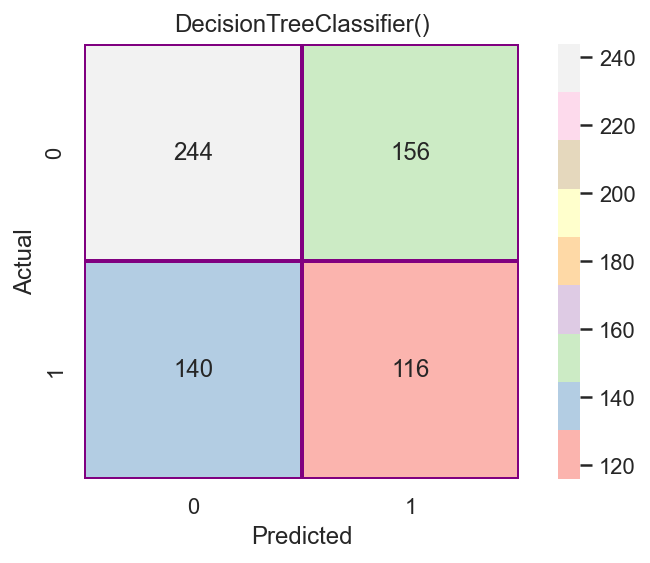

In [61]:

# scaler8 = PowerTransformer() #Model Decision Tree = s1m3
s8m3confuaion_matrix, s8m3accuracy, s8m3preccision, s8m3recall, s8m3f1_score, s8m3_score_train, s8m3_score_test, heatmap  = model_inplace(scaler8, model3, X_train, X_test, y_train, y_test)
print(f'Confusion Matrix S1M3 \n {s8m3confuaion_matrix}')
print(f'Accuracy S1M3 {s8m3accuracy} \n')
print(f'Precision S1M3 {s8m3preccision} \n')
print(f'Recall  S1M3 {s8m3recall} \n')
print(f'F1_Score {s8m3f1_score} \n')
print(f'Score_Train {s8m3_score_train} \n')
print(f'Score_test {s8m3_score_test} \n')

* scaler1 = StandardScaler()
* scaler2 = MinMaxScaler()
* scaler3 = PolynomialFeatures(degree=2, interaction_only=True)
* scaler4 = MaxAbsScaler()
* scaler5 = RobustScaler()
* scaler6 = Normalizer()
* scaler7 = QuantileTransformer()
* scaler8 = PowerTransformer()

In [62]:
tree_SC = pd.DataFrame(pd.Series([s1m3accuracy, s1m3preccision, s1m3recall, s1m3f1_score, s1m3_score_train, s1m3_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['Tree_SC'])
tree_MM = pd.DataFrame(pd.Series([s2m3accuracy, s2m3preccision, s2m3recall, s2m3f1_score, s2m3_score_train, s2m3_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['Tree_MM'])
tree_PL = pd.DataFrame(pd.Series([s3m3accuracy, s3m3preccision, s3m3recall, s3m3f1_score, s3m3_score_train, s3m3_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['tree_PL'])
tree_MA = pd.DataFrame(pd.Series([s4m3accuracy, s4m3preccision, s4m3recall, s4m3f1_score, s4m3_score_train, s4m3_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['tree_MA'])
tree_RS = pd.DataFrame(pd.Series([s5m3accuracy, s5m3preccision, s5m3recall, s5m3f1_score, s5m3_score_train, s5m3_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['tree_RS'])
tree_N = pd.DataFrame(pd.Series([s6m3accuracy, s6m3preccision, s6m3recall, s6m3f1_score, s6m3_score_train, s6m3_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['tree_N'])
tree_QT = pd.DataFrame(pd.Series([s7m3accuracy, s7m3preccision, s7m3recall, s7m3f1_score, s7m3_score_train, s7m3_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['tree_QT'])
tree_PT = pd.DataFrame(pd.Series([s8m3accuracy, s8m3preccision, s8m3recall, s8m3f1_score, s8m3_score_train, s8m3_score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'Score_Train', 'Score_Test']), columns=['tree_PT'])

In [63]:
models_tree = pd.concat([tree_SC, tree_MM, tree_PL, tree_MA, tree_RS, tree_N, tree_QT, tree_PT], axis=1)

In [64]:
models_tree = models_tree.T

In [88]:
models_tree = models_tree.sort_values(by=['Recall', 'F1_Score', 'Preccision'], ascending=False).round(2)

In [89]:
## Scaler Selection for Decision Tree Scaler
models_tree

,Accuray,Preccision,Recall,F1_Score,Score_Train,Score_Test
Tree_MM,0.56,0.44,0.48,0.46,1.0,0.56
Tree_SC,0.57,0.45,0.47,0.46,1.0,0.57
tree_QT,0.56,0.44,0.47,0.45,1.0,0.56
tree_PL,0.59,0.47,0.46,0.47,1.0,0.59
tree_PT,0.55,0.43,0.45,0.44,1.0,0.55
tree_MA,0.55,0.43,0.45,0.44,1.0,0.55
tree_RS,0.54,0.41,0.45,0.43,1.0,0.54
tree_N,0.56,0.43,0.40,0.41,1.0,0.56


In [67]:
models_tree.to_excel('Reports_Insight_Tables\models_tree.xlsx')

In [68]:
model3.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [69]:
for x in range(0, 1000, 100):
    print(x)

0
100
200
300
400
500
600
700
800
900


In [ ]:
parameters = {#'ccp_alpha': [1, 2, 5, 10, 50, 100, 500, 100],
 #'class_weight': [{0: 1, 1: 5}, {0: 1, 1: 5}, {0: 5, 1: 1}],
 #'criterion': ['gini'],
 'max_depth': [x for x in range(0,50)],
 'max_features': [x for x in range(0,50)]}
 #'max_leaf_nodes': [1,5,10,20,50,100],
 #'min_impurity_decrease': [1,5,10,20,50,100],
 #'min_samples_leaf': [1,5,10,20,50,100],
 #'min_samples_split': [1,5,10,20,50,100],
 #'min_weight_fraction_leaf': [1,5,10,20,50,100],
 #'random_state': ['None'],
 #'splitter': ['best']

In [ ]:
clf = GridSearchCV(model3, parameters)
GridSearchCV(estimator=clf,
             param_grid=parameters)


GridSearchCV(estimator=GridSearchCV(estimator=DecisionTreeClassifier(),
                                    param_grid={'max_depth': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19, 20, 21, 22,
                                                              23, 24, 25, 26,
                                                              27, 28, 29, ...],
                                                'max_features': [0, 1, 2, 3, 4,
                                                                 5, 6, 7, 8, 9,
                                                                 10, 11, 12, 13,
                                                                 14, 15, 16, 17,
                                                                 18, 19, 20, 21,
                                                                 22, 23, 24, 25,
                                                                 26, 27, 28, 29, ...]}),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, ...],
                         'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]})

In [ ]:
clf = GridSearchCV(model3, parameters)
clf.fit(X, y)

print('min_samples_leaf:', clf.best_estimator_.get_params()['dec_tree__min_samples_leaf'])
print('Best max_depth:', clf.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['dec_tree'])

In [ ]:
sorted(model3.cv_results_.keys())

## Confidence Interval 

In [71]:
potable = df10.loc[df['Potability']==1]
no_potable = df10.loc[df10['Potability']==0]

### PH

In [72]:
mean_no_potable = no_potable['ph'].mean()
std_no_potable = no_potable['ph'].std()
print(mean_no_potable, std_no_potable)
n = len(no_potable)
t =  stats.t.ppf(0.975, df=n-1)
error_no_potable = t * std_no_potable/(n**0.5)
print(error_no_potable)
print((mean_no_potable- error_no_potable), (mean_no_potable + error_no_potable))

7.082630772705141 1.5593680886673302
0.06841672648477434
7.014214046220366 7.151047499189915


In [73]:
mean_potable = potable['ph'].mean()
std_potable = potable['ph'].std()
print(mean_potable, std_potable)
n = len(potable)
t =  stats.t.ppf(0.975, df=n-1)
error_potable = t * std_potable/(n**0.5)
print(error_potable)
print((mean_potable - error_potable), (mean_potable + error_potable))

7.0754696501508745 1.3587109210859003
0.07456268718643103
7.000906962964444 7.150032337337305


In [74]:
ph = pd.concat([pd.DataFrame(pd.Series(((mean_no_potable - error_no_potable), (mean_no_potable + error_no_potable)), index=['lower', 'upper']), columns=['no_potable']),
pd.DataFrame(pd.Series(((mean_potable - error_potable), (mean_potable + error_potable)), index=['lower', 'upper']), columns=['potable'])], axis=1)

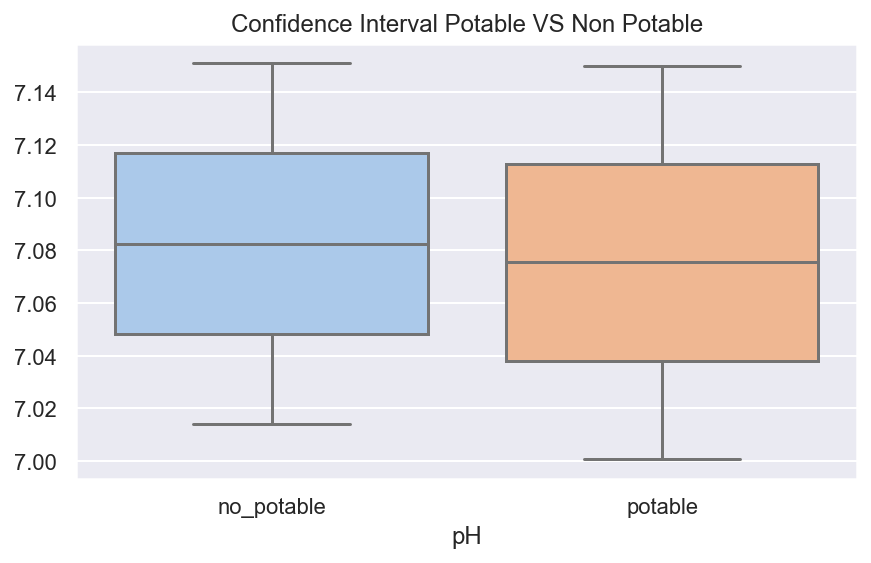

In [75]:
sns.boxplot(data=ph)
plt.title('Confidence Interval Potable VS Non Potable')
plt.xlabel('pH')
plt.savefig('viz/ph.png')

# Sulfate 

In [76]:
mean_no_potable = no_potable['Sulfate'].mean()
std_no_potable = no_potable['Sulfate'].std()
print(mean_no_potable, std_no_potable)
n = len(no_potable)
t =  stats.t.ppf(0.975, df=n-1)
error_no_potable = t * std_no_potable/(n**0.5)
print(error_no_potable)
print((mean_no_potable- error_no_potable), (mean_no_potable + error_no_potable))

334.1548820359377 32.78149144136597
1.438276408249225
332.71660562768847 335.59315844418694


In [77]:
mean_potable = potable['Sulfate'].mean()
std_potable = potable['Sulfate'].std()
print(mean_potable, std_potable)
n = len(potable)
t =  stats.t.ppf(0.975, df=n-1)
error_potable = t * std_potable/(n**0.5)
print(error_potable)
print((mean_potable - error_potable), (mean_potable + error_potable))

332.7951243432819 42.49977857847437
2.332282493988302
330.46284184929357 335.1274068372702


In [78]:
sulfate =  pd.concat([pd.DataFrame(pd.Series(((mean_no_potable - error_no_potable), (mean_no_potable + error_no_potable)), index=['lower', 'upper']), columns=['no_potable']),
pd.DataFrame(pd.Series(((mean_potable - error_potable), (mean_potable + error_potable)), index=['lower', 'upper']), columns=['potable'])], axis=1)

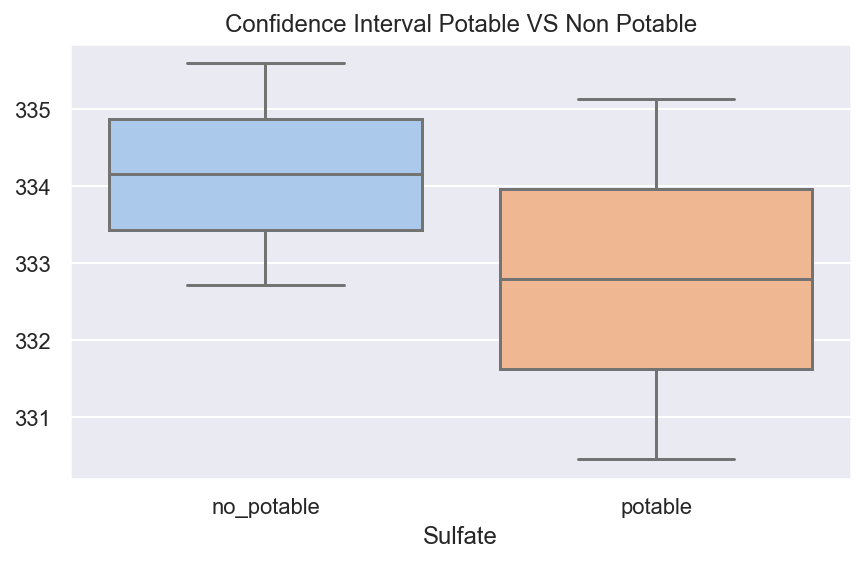

In [79]:
sns.boxplot(data=sulfate)
plt.title('Confidence Interval Potable VS Non Potable')
plt.xlabel('Sulfate')
plt.savefig('viz/sulfate.png')

### Chloramines

In [80]:
mean_no_potable = no_potable['Chloramines'].mean()
std_no_potable = no_potable['Chloramines'].std()
print(mean_no_potable, std_no_potable)
n = len(no_potable)
t =  stats.t.ppf(0.975, df=n-1)
error_no_potable = t * std_no_potable/(n**0.5)
print(error_no_potable)
print((mean_no_potable- error_no_potable), (mean_no_potable + error_no_potable))

7.09217456344374 1.501044941498871
0.06585781891410199
7.0263167445296375 7.158032382357842


In [81]:
mean_potable = potable['Chloramines'].mean()
std_potable = potable['Chloramines'].std()
print(mean_potable, std_potable)
n = len(potable)
t =  stats.t.ppf(0.975, df=n-1)
error_potable = t * std_potable/(n**0.5)
print(error_potable)
print((mean_potable - error_potable), (mean_potable + error_potable))

7.169338026214628 1.7029876826324724
0.09345574241869381
7.075882283795933 7.262793768633322


In [82]:
chloramines = sulfate =  pd.concat([pd.DataFrame(pd.Series(((mean_no_potable - error_no_potable), (mean_no_potable + error_no_potable)), index=['lower', 'upper']), columns=['no_potable']),
pd.DataFrame(pd.Series(((mean_potable - error_potable), (mean_potable + error_potable)), index=['lower', 'upper']), columns=['potable'])], axis=1)

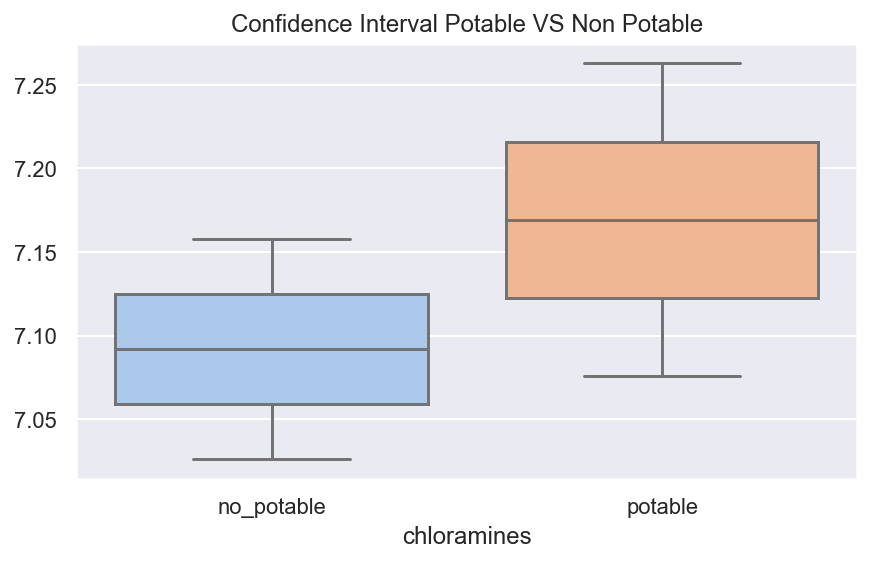

In [83]:
sns.boxplot(data=chloramines)
plt.title('Confidence Interval Potable VS Non Potable')
plt.xlabel('chloramines')
plt.savefig('viz/chloramines.png')

## Viz

In [86]:
df = df10.copy()

In [87]:
d= pd.DataFrame(df['Potability'].value_counts())
fig = px.pie(d,values='Potability',names=['Not Potable','Potable'],hole=0.4,opacity=0.6,
        
             labels={'label':'Potability','Potability':'No. Of Samples'})

fig.add_annotation(text='Potability',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Q. How many samples of water are Potable?',x=0.47,y=0.98,),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()